In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [4]:
data_train_path = '../content/drive/MyDrive/Fruits_Vegetables/train'
data_test_path = '../content/drive/MyDrive/Fruits_Vegetables/test'
data_validation_path = '../content/drive/MyDrive/Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_validation = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


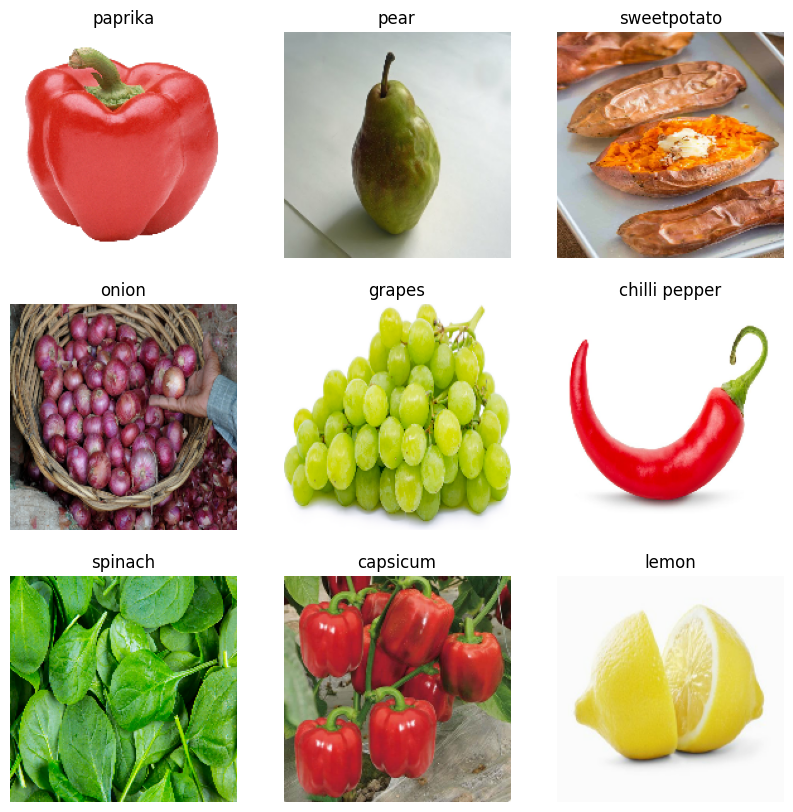

In [11]:
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), # reduces dimensions and highlights sharp features
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2), # prevents overfitting
    layers.Dense(120), # calculating output = activation(dot(input, kernel) + bias)
    layers.Dense(len(data_cat))
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [16]:
epochs = 25
history = model.fit(data_train, validation_data=data_validation, epochs=epochs)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 537s 5s/step - accuracy: 0.0814 - loss: 3.8725 - val_accuracy: 0.3675 - val_loss: 2.1925
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.2717 - loss: 2.4849 - val_accuracy: 0.4444 - val_loss: 1.7563
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.3764 - loss: 2.1161 - val_accuracy: 0.5983 - val_loss: 1.3531
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.4784 - loss: 1.7531 - val_accuracy: 0.7322 - val_loss: 0.9456
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6093 - loss: 1.3201 - val_accuracy: 0.8661 - val_loss: 0.6179
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7356 - loss: 0.9179 - val_accuracy: 0.9060 - val_loss: 0.4551
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8314 - loss: 0.5813 - val_accuracy: 0.9117 - val_loss: 0.4264
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9079 - loss: 0.3647 - val_accuracy: 0.9259 - v

Text(0.5, 1.0, 'Loss')

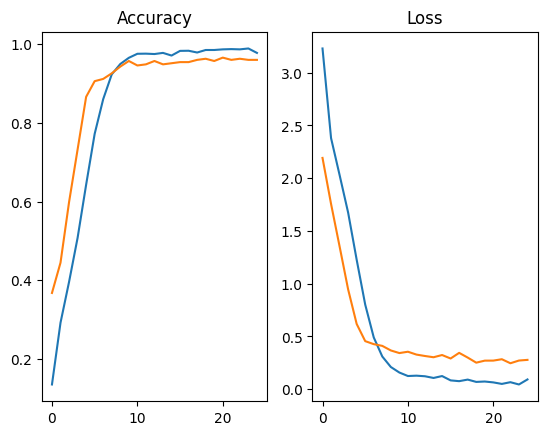

In [17]:
epochs_range = range(epochs)
plt.figsize = (8,8)
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label="training accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="validation accuracy")
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label="training loss")
plt.plot(epochs_range, history.history['val_loss'], label="validation loss")
plt.title('Loss')

In [19]:
image = 'apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
imput_array = tf.keras.utils.img_to_array(image)
image_batch = tf.expand_dims(imput_array, 0)

In [20]:
predict = model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [21]:
score = tf.nn.softmax(predict)
print("This is an image of {} with accuracy = {:0.2f}".format(data_cat[np.argmax(score)], 100*np.max(score)))

This is an image of apple with accuracy = 96.23


In [22]:
model.save('Image_Classifier.keras')